In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 匯入MINIST手寫辨識數據集以及資料前處理
使用 tensorflow.keras.datasets 28x28 的手寫數字數據集

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train.reshape(len(X_train),-1)/255
X_test=X_test.reshape(len(X_test),-1)/255
# one hot encoding
y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


In [3]:
y_train_one_hot[50]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [4]:
y_train[50]

3

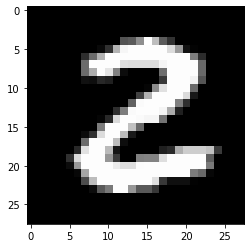

2


In [5]:
plt.imshow(X_train[25].reshape(28, 28), cmap='gray')
plt.show()
print(y_train[25])

## 2. 建立網路模型

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


In [7]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
def build_model():
    model = Sequential()
    model.add(Dense(25, Activation('relu'), input_dim=X_train.shape[-1]))
    model.add(Dense(10, Activation('softmax')))
    return model

In [8]:
model = build_model()
model.summary()   # Weights = (784+1)*25+(25+1)*10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


## 3. 編譯&訓練模型

In [9]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])


# 訓練模型
history = model.fit(X_train, y_train_one_hot,
                    batch_size=64,
                    epochs=25,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Epoch 1/25
844/844 [==============================] - 2s 2ms/step - loss: 0.4708 - acc: 0.8700 - val_loss: 0.2277 - val_acc: 0.9380
Epoch 2/25
844/844 [==============================] - 1s 2ms/step - loss: 0.2568 - acc: 0.9277 - val_loss: 0.1868 - val_acc: 0.9497
Epoch 3/25
844/844 [==============================] - 1s 2ms/step - loss: 0.2168 - acc: 0.9387 - val_loss: 0.1676 - val_acc: 0.9535
Epoch 4/25
844/844 [==============================] - 1s 2ms/step - loss: 0.1887 - acc: 0.9468 - val_loss: 0.1538 - val_acc: 0.9563
Epoch 5/25
844/844 [==============================] - 1s 2ms/step - loss: 0.1676 - acc: 0.9521 - val_loss: 0.1454 - val_acc: 0.9582
Epoch 6/25
844/844 [==============================] - 1s 2ms/step - loss: 0.1503 - acc: 0.9570 - val_loss: 0.1360 - val_acc: 0.9615
Epoch 7/25
844/844 [==============================] - 1s 2ms/step - loss: 0.1361 - acc: 0.9610 - val_loss: 0.1287 - val_acc: 0.9630
Epoch 8/25
844/844 [==============================] - 2s 2ms/step - loss: 0.

## 4) 觀察訓練結果

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [11]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

### 訓練集和測試集 loss

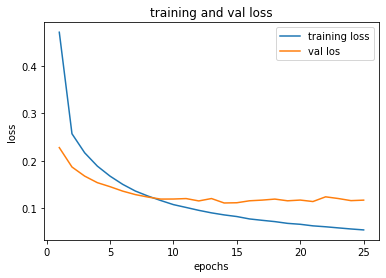

In [12]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### 訓練集和測試集 accuracy

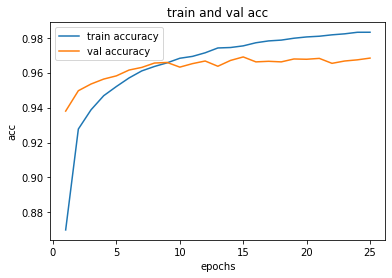

In [13]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 測試集預測

In [14]:
from sklearn.metrics import accuracy_score

pred =  np.argmax(model.predict(X_test), axis=1)
accuracy_score(y_test, pred)

0.9641

## 統計training set預測預測正確與錯誤內容
10000 筆測試圖片中個找出前 8 張預測正確與錯誤的圖片。

In [15]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(X_test)):
    if(y_test[i]==pred[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(X_test)):
    if(y_test[i]!=pred[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

### training set 預測正確

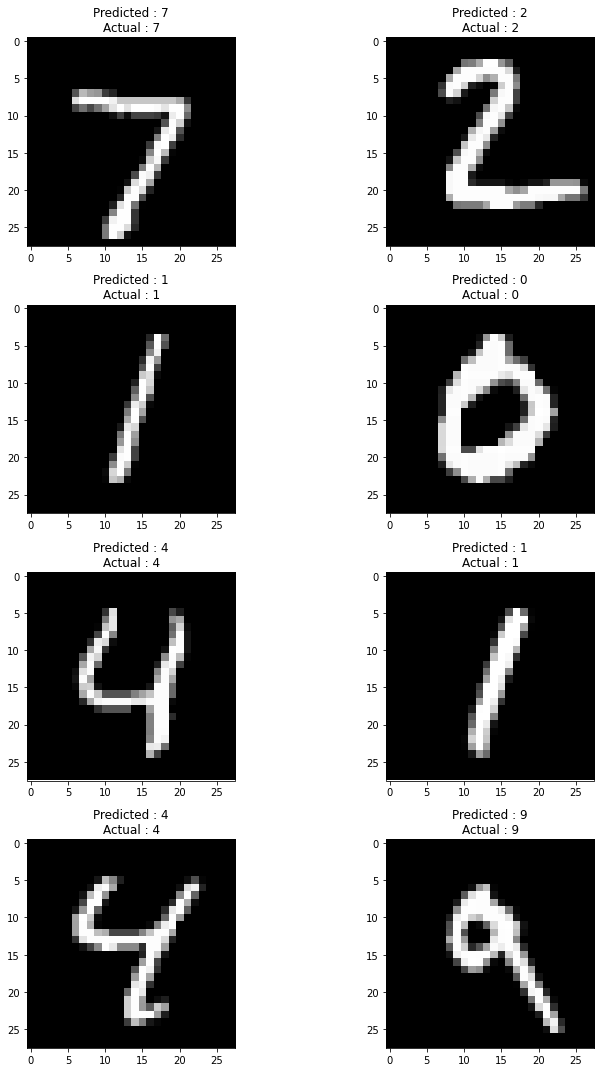

In [16]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]].reshape(28, 28), cmap='gray')
        ax[i,j].set_title("Predicted : "+str(pred[prop_class[count]])+"\n"+"Actual : "+str(y_test[prop_class[count]]))
        plt.tight_layout()
        count+=1

### testing set 預測錯誤

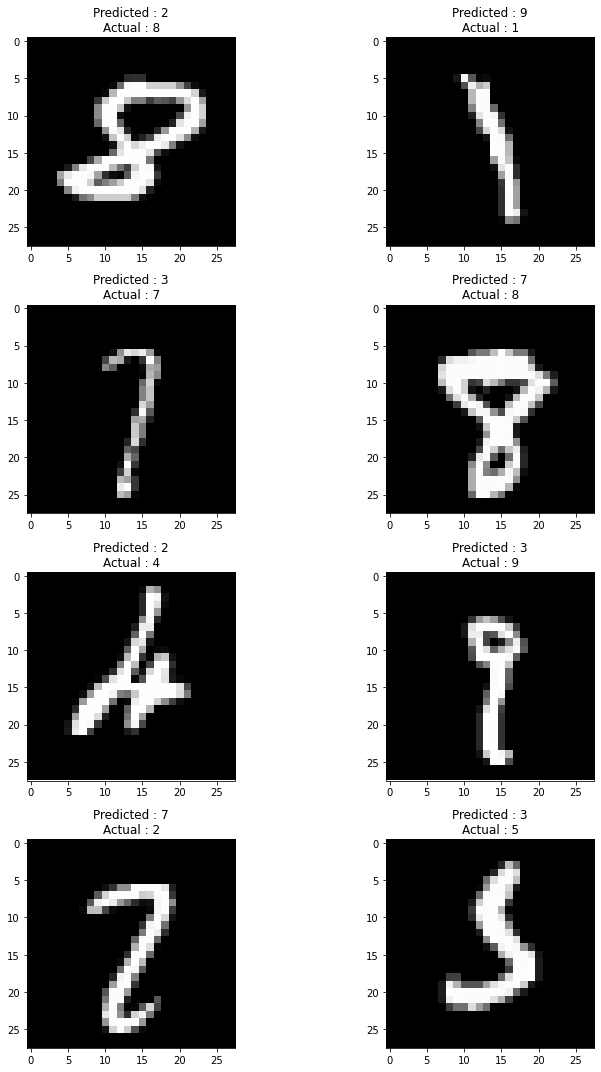

In [17]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[mis_class[count]].reshape(28, 28), cmap='gray')
        ax[i,j].set_title("Predicted : "+str(pred[mis_class[count]])+"\n"+"Actual : "+str(y_test[mis_class[count]]))
        plt.tight_layout()
        count+=1